In [140]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt


df = pd.read_csv("data\\2m_292_crop.csv", header=None)

x_pixel, y_pixel = 570, 570
bodyparts = ['snout', 'mouth', 'paw_VL','paw_VR', 'middle', 'paw_HL', 'paw_HR','anus', 'tail_start', 'tail_middle', 'tail_end']
all_bodyparts = ['snout_x', 'snout_y', 'snout_likelihood', 
             'mouth_x', 'mouth_y', 'mouth_likelihood', 
             'paw_VL_x', 'paw_VL_y', 'paw_VL_likelihood',
             'paw_VR_x', 'paw_VR_y', 'paw_VR_likelihood', 
             'middle_x', 'middle_y', 'middle_likelihood', 
             'paw_HL_x', 'paw_HL_y', 'paw_HL_likelihood', 
             'paw_HR_x', 'paw_HR_y', 'paw_HR_likelihood', 
             'anus_x', 'anus_y', 'anus_likelihood', 
             'tail_start_x', 'tail_start_y', 'tail_start_likelihood', 
             'tail_middle_x', 'tail_middle_y', 'tail_middle_likelihood', 
             'tail_end_x', 'tail_end_y', 'tail_end_likelihood']


# combines the string of the two rows to create new header
new_columns = [f"{col[0]}_{col[1]}" for col in zip(df.iloc[1], df.iloc[2])]     # df.iloc[0] takes all values of first row
df.columns = new_columns
df = df.drop(labels=[0, 1, 2], axis="index")

# adapt index
df.set_index('bodyparts_coords', inplace=True)
df.index.names = ['frames']

# turn all the prior string values into floats
df = df.astype(float)

# flip the video along the x axis
for column in df.columns:
    if '_y' in column:
        df[column] = y_pixel - df[column] 

# whereever _likelihood <= x, change _x & _y to nan
for bodypart in bodyparts:
    filter = df[f'{bodypart}_likelihood'] <= 0.9
    df.loc[filter, f'{bodypart}_x'] = math.nan
    df.loc[filter, f'{bodypart}_y'] = math.nan
    df = df.drop(labels=f'{bodypart}_likelihood', axis="columns")

print(df)


           snout_x     snout_y     mouth_x     mouth_y    paw_VL_x  \
frames                                                               
0       445.429406  164.072381  448.466935  154.030563  477.915462   
1       450.404785  163.284980  451.368234  153.176320  478.746692   
2       450.808225  163.284980  452.823173  153.176320  478.901801   
3       450.808225  164.072381  451.368234  154.030563  478.746692   
4       450.808225  164.794035  451.368234  155.423554  478.746692   
...            ...         ...         ...         ...         ...   
9995     55.351167  510.972960   60.241177  501.056821   75.467865   
9996     54.678515  510.539739   60.241177  501.056821   74.098753   
9997     56.256939  510.539739   60.640838  501.124033   74.098753   
9998     56.793766  510.476904   60.640838  500.657571   73.552505   
9999     56.256939  508.576574   60.640838  499.908000   72.565133   

          paw_VL_y    paw_VR_x    paw_VR_y    middle_x    middle_y  ...  \
frames        

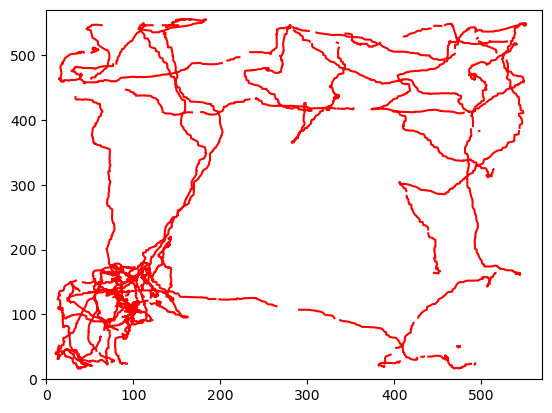

In [141]:
plt.plot(df['snout_x'], df['snout_y'], color='r')
plt.xlim(0, x_pixel)
plt.ylim(0, y_pixel)

plt.show()